In [176]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

In [55]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.orm import Session

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
#show all the table inside the hawaii dababase
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [14]:
columns_m = inspector.get_columns('measurement')
columns_m

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [15]:
columns_s = inspector.get_columns('station')
columns_s

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23')

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_before = dt.date(2017,8,23)-dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_before).all()

results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [75]:
# Sort the dataframe by date
# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by = ['date'])
results_df_final = results_df.reset_index(drop = True)
results_df_final['date'] = pd.to_datetime(results_df_final['date'])
results_df_final

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,NaN
2,2016-08-23,1.79
3,2016-08-23,0.05
4,2016-08-23,0.15
...,...,...
2225,2017-08-22,0.00
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


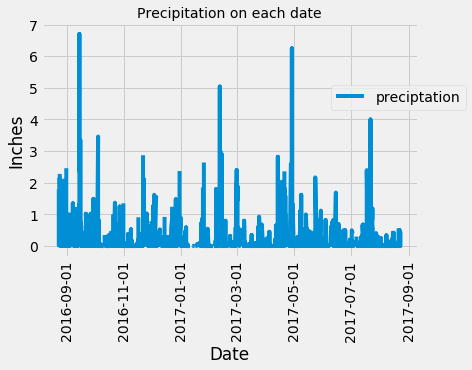

In [191]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
plt.plot(results_df_final['date'], results_df_final['prcp'])
plt.title("Precipitation on each date", size = 14)
plt.xlabel("Date")
plt.ylabel('Inches')
plt.xticks(rotation=90)
myFmt = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(myFmt)
ax.legend([ax.get_lines()[0]],['preciptation'],bbox_to_anchor=(0.75, 0.6))
plt.savefig("Precipitation on each date.png")
plt.show()

In [80]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df_final['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [108]:
# Design a query to calculate the total number stations in the dataset
total_number_stations = session.query(func.count(Station.station)).all()
total_number_stations

[(9)]

In [110]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_query= session.query(Measurement.station, Measurement.tobs).all()
stations_query

[('USC00519397', 65.0),
 ('USC00519397', 63.0),
 ('USC00519397', 74.0),
 ('USC00519397', 76.0),
 ('USC00519397', 73.0),
 ('USC00519397', 70.0),
 ('USC00519397', 64.0),
 ('USC00519397', 68.0),
 ('USC00519397', 73.0),
 ('USC00519397', 64.0),
 ('USC00519397', 61.0),
 ('USC00519397', 66.0),
 ('USC00519397', 65.0),
 ('USC00519397', 68.0),
 ('USC00519397', 64.0),
 ('USC00519397', 72.0),
 ('USC00519397', 66.0),
 ('USC00519397', 66.0),
 ('USC00519397', 69.0),
 ('USC00519397', 67.0),
 ('USC00519397', 67.0),
 ('USC00519397', 71.0),
 ('USC00519397', 67.0),
 ('USC00519397', 76.0),
 ('USC00519397', 68.0),
 ('USC00519397', 72.0),
 ('USC00519397', 70.0),
 ('USC00519397', 67.0),
 ('USC00519397', 66.0),
 ('USC00519397', 67.0),
 ('USC00519397', 69.0),
 ('USC00519397', 67.0),
 ('USC00519397', 67.0),
 ('USC00519397', 64.0),
 ('USC00519397', 69.0),
 ('USC00519397', 73.0),
 ('USC00519397', 73.0),
 ('USC00519397', 69.0),
 ('USC00519397', 69.0),
 ('USC00519397', 69.0),
 ('USC00519397', 71.0),
 ('USC00519397',

In [122]:
stations_df = pd.DataFrame(stations_query)
stations_df

,station,tobs
0,USC00519397,65.0
1,USC00519397,63.0
2,USC00519397,74.0
3,USC00519397,76.0
4,USC00519397,73.0
...,...,...
19545,USC00516128,71.0
19546,USC00516128,78.0
19547,USC00516128,76.0
19548,USC00516128,76.0


In [129]:
stations_df_groupby = stations_df.groupby(['station'])
stations_df_count = stations_df_groupby['station'].count()
stations_count = pd.DataFrame(stations_df_count)
stations_count = stations_count.rename({'station':'station count'}, axis = 1)
stations_count = stations_count.sort_values(by = ['station count'],ascending=False)
stations_count

,station count
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [140]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
lowest_temp

[(54.0)]

In [141]:
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
highest_temp

[(85.0)]

In [143]:
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
average_temp

[(71.66378066378067)]

In [149]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_before = dt.date(2017,8,23)-dt.timedelta(days = 365)
results_1 = session.query(Measurement.tobs).filter(Measurement.date >= one_year_before).filter(Measurement.station == 'USC00519281').all()
results_1

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [188]:
active_station_df = pd.DataFrame(results_1)
active_station_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


In [152]:
max_tobs = active_station_df['tobs'].max()
min_tobs = active_station_df['tobs'].min()
print(f"the max number is {max_tobs}, the min number is {min_tobs}")

the max number is 83.0, the min number is 59.0


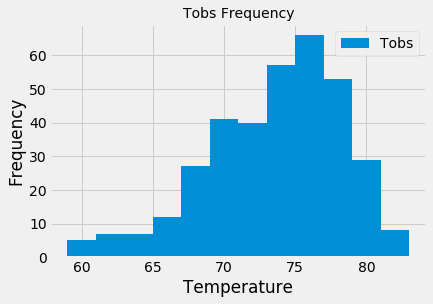

In [192]:
active_station_df.hist(bins = 12)
plt.title("Tobs Frequency", size = 14)
plt.xlabel("Temperature")
plt.ylabel('Frequency')
labels = ["Tobs"]
plt.legend(labels)
plt.savefig("Tobs Frequency.png")
plt.show()

# Close session

In [193]:
# Close Session
session.close()